<a href="https://colab.research.google.com/github/Wfuller25/Business-Appl-of-Python/blob/main/LACrimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World!

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [14]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:

import pandas as pd
import requests
from io import StringIO

orig_url='https://drive.google.com/file/d/1IpaEmZhLOOSrglr2onyq58pCz2cmtN8L/view?usp=sharing' # share link to data set

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
crimes = pd.read_csv(csv_raw, dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [16]:
# # part 1

# Convert TIME OCC to proper hour format (assuming it's in HHMM format)
crimes["TIME OCC"] = crimes["TIME OCC"].str.zfill(4)
crimes["HOUR"] = crimes["TIME OCC"].str[:2].astype(int)

peak_crime_hour = crimes["HOUR"].value_counts().idxmax()
print(peak_crime_hour)



12


Text(0, 0.5, 'Crime Frequency')

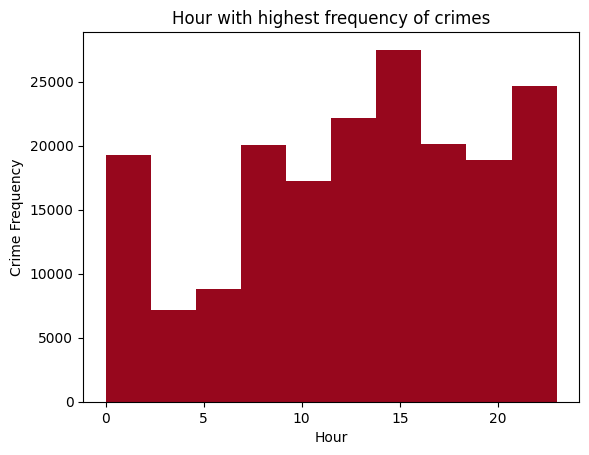

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
# build the histogram
plt.hist(crimes['HOUR'], color='#97071d')

# customize the graphic
plt.title('Hour with highest frequency of crimes')
plt.xlabel('Hour')
plt.ylabel('Crime Frequency')

In [18]:
#Q2 - Which area has largest frequency of night crimes
night_hours = list(range(22, 24)) + list(range(0, 4))  # 22, 23, 0, 1, 2, 3
night_crimes = crimes[crimes["HOUR"].isin(night_hours)]
peak_night_crime_location = night_crimes["AREA NAME"].value_counts().idxmax()
print(peak_night_crime_location)


Central


In [19]:
#Q3 - Identify number of crimes committed against victims of different age groups
def categorize_age(age):
    if pd.isnull(age):
        return np.nan
    elif age <= 17:
        return "0-17"
    elif age <= 25:
        return "18-25"
    elif age <= 34:
        return "26-34"
    elif age <= 44:
        return "35-44"
    elif age <= 54:
        return "45-54"
    elif age <= 64:
        return "55-64"
    else:
        return "65+"

crimes["Age Group"] = crimes["Vict Age"].apply(categorize_age)
victim_ages = crimes["Age Group"].value_counts().reindex(
    ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
).fillna(0).astype(int)
print(victim_ages)


Age Group
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64
